In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns
%matplotlib inline
rng = np.random.RandomState(10)

In [55]:
X = (.7 *rng.randn(100, 2))+3
X_outliers = rng.uniform(low=1, high=9, size=(20, 2))

In [62]:
X_train = np.concatenate((X,X_outliers),axis=0)
X_train

array([[ 2.70635497,  3.88945965],
       [ 1.89652727,  3.46939457],
       [ 3.70563401,  4.26210967],
       [ 2.97172374,  2.56497021],
       [ 1.93045591,  3.13976392],
       [ 2.29515785,  3.0436282 ],
       [ 2.86682497,  3.2974553 ],
       [ 2.879664  ,  2.89911205],
       [ 3.85924239,  3.05515826],
       [ 3.86942286,  2.43169273],
       [ 3.31243117,  3.24976681],
       [ 2.69369508,  2.2013688 ],
       [ 2.33830031,  3.23122617],
       [ 3.67294509,  3.17168191],
       [ 3.93449183,  3.15975206],
       [ 2.91951174,  3.03545752],
       [ 3.56714453,  3.83119024],
       [ 1.75063863,  3.25108225],
       [ 3.09097945,  3.65048652],
       [ 3.24395867,  2.56718811],
       [ 1.85707894,  2.06267048],
       [ 1.47403502,  4.45962978],
       [ 3.02946271,  2.81025946],
       [ 2.88072539,  3.05437079],
       [ 3.05508433,  2.31678546],
       [ 3.31958068,  2.63240656],
       [ 3.33146495,  2.99593244],
       [ 3.5062579 ,  3.19120321],
       [ 1.86999251,

In [211]:
X_testoutliers = rng.uniform(low=1, high=9, size=(10, 2))
X_testnorm = (.7 *rng.randn(10, 2))+3
X_test = np.concatenate((X_testnorm,X_testoutliers),axis=0)
X_test

array([[ 3.1089936 ,  2.9952948 ],
       [ 3.03974424,  1.68885332],
       [ 4.11875983,  3.21325607],
       [ 1.94413196,  4.99365197],
       [ 1.82570909,  2.9205639 ],
       [ 3.07870375,  3.09580333],
       [ 2.44584916,  2.91825877],
       [ 3.35216672,  4.28300755],
       [ 2.71742863,  2.35817933],
       [ 3.08898542,  3.46223082],
       [ 7.3117094 ,  5.49901936],
       [ 2.67873751,  2.40810877],
       [ 3.34428941,  5.58970679],
       [ 6.84422552,  6.3828942 ],
       [ 8.68573701,  7.32356964],
       [ 3.32050296,  5.16950373],
       [ 6.86313779,  7.90965738],
       [ 5.01969386,  1.83208173],
       [ 8.04902208,  1.5838127 ],
       [ 8.95541522,  4.64977661]])

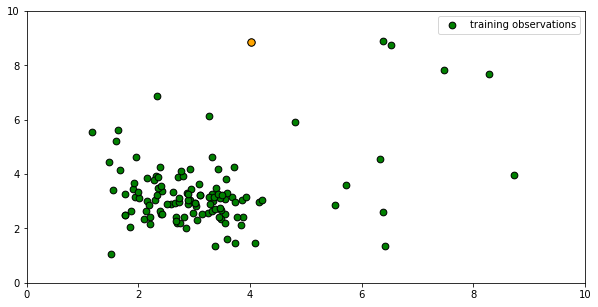

In [64]:
plt.subplots(1, figsize=(10, 5))
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='green',
                 s=45, edgecolor='k')

plt.axis('tight')
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.legend([b1],
           ["training observations"],
           loc='best')
plt.xlabel('',fontsize = 18)
plt.ylabel('',fontsize = 18);

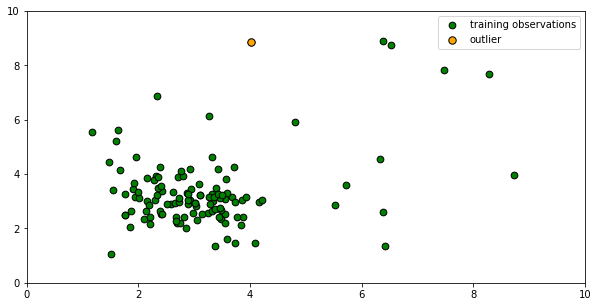

In [84]:
plt.subplots(1, figsize=(10, 5))
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='green',
                 s=45, edgecolor='k')
x = plt.scatter(X_train[-3,0], X_train[-3,1], c='orange',
                 s=55, edgecolor='k')

plt.axis('tight')
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.legend([b1,x],
           ["training observations","outlier"],
           loc='best')
plt.xlabel('',fontsize = 18)
plt.ylabel('',fontsize = 18);

In [204]:
isofortrain = IsolationForest(n_estimators = 1000,
                             max_samples = 'auto', 
                             contamination = .20,
                             max_features = 1,
                             random_state = rng,
                             n_jobs = -1)
isofortrain.fit(X_train)
anomalytrain = isofortrain.decision_function(X_train)
predicttrain = isofortrain.predict(X_train)

In [205]:
testframe = pd.DataFrame(X_train)
testframe.shape

(120, 2)

In [206]:
testframe['score'] = anomalytrain
testframe['outlier'] = predicttrain
testframe.tail()

,0,1,score,outlier
115,2.206048,2.161630,0.040927,1
116,4.804286,5.902047,-0.094541,-1
117,4.010274,8.877811,-0.057537,-1
118,8.739412,3.954488,-0.078311,-1
119,1.633678,5.621243,-0.039224,-1


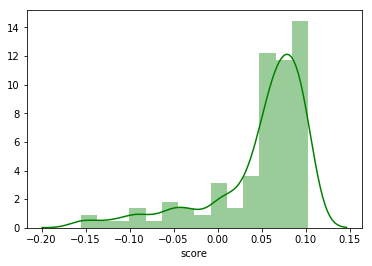

In [207]:
sns.distplot(testframe['score'],hist=True, kde=True, color='g');

In [208]:
testnorm = testframe[testframe['outlier']==1]
testout = testframe[testframe['outlier']==-1]

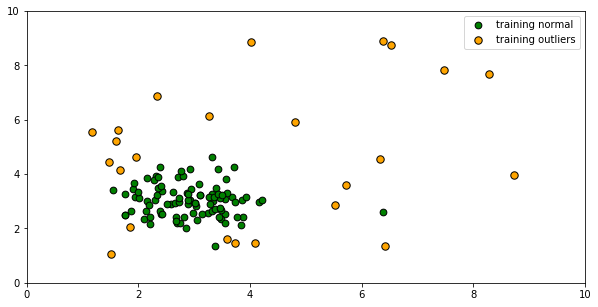

In [209]:
plt.subplots(1, figsize=(10, 5))
b1 = plt.scatter(testnorm[0], testnorm[1], c='green',
                 s=45, edgecolor='k')
x = plt.scatter(testout[0], testout[1], c='orange',
                 s=55, edgecolor='k')

plt.axis('tight')
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.legend([b1,x],
           ["training normal","training outliers"],
           loc='best')
plt.xlabel('',fontsize = 18)
plt.ylabel('',fontsize = 18);

In [153]:
trainnormdf = pd.DataFrame(X)
trainnormdf['outlier'] = 1
trainoutdf = pd.DataFrame(X_outliers)
trainoutdf['outlier'] = -1
X_train_sup = trainnormdf.append(trainoutdf)
X_train_sup.columns.values[0] = 'x'
X_train_sup.columns.values[1] = 'y'
supdf = X_train_sup
y_train = X_train_sup.pop('outlier')

In [214]:
isofortrainsup = IsolationForest(n_estimators = 1000,
                             max_samples = 'auto', 
                             contamination = .20,
                             max_features = 1,
                             random_state = rng,
                             n_jobs = -1)
isofortrainsup.fit(X_train_sup,y_train)
anomalytrainsup = isofortrainsup.decision_function(X_train_sup)
predicttrainsup = isofortrainsup.predict(X_train_sup)

In [249]:
predicttrainsup

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1])

In [201]:
supdf['score'] = anomalytrainsup
supdf['outlier'] = predicttrainsup
supdf.tail(20)

,x,y,score,outlier
0,1.590836,5.225510,-0.060653,-1
1,6.321172,4.545047,-0.061819,-1
2,8.282232,7.697457,-0.149238,-1
3,1.514298,1.074596,-0.089349,-1
4,2.325382,6.877196,-0.047846,-1
5,6.518534,8.754924,-0.122392,-1
6,6.419258,1.353259,-0.070890,-1
7,6.375698,8.894960,-0.092804,-1
8,1.960446,4.641551,-0.044492,-1
9,6.375371,2.611571,-0.012157,-1


In [202]:
suptestnorm = supdf[supdf['outlier']==1]
suptestout = supdf[supdf['outlier']==-1]

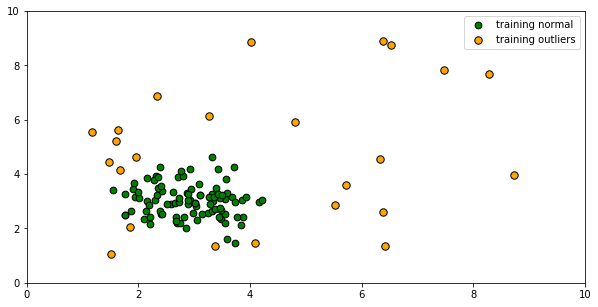

In [203]:
plt.subplots(1, figsize=(10, 5))
b1 = plt.scatter(suptestnorm['x'], suptestnorm['y'], c='green',
                 s=45, edgecolor='k')
x = plt.scatter(suptestout['x'], suptestout['y'], c='orange',
                 s=55, edgecolor='k')

plt.axis('tight')
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.legend([b1,x],
           ["training normal","training outliers"],
           loc='best')
plt.xlabel('',fontsize = 18)
plt.ylabel('',fontsize = 18);

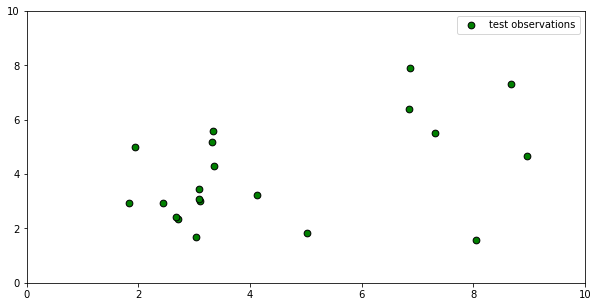

In [218]:
plt.subplots(1, figsize=(10, 5))
b1 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=45, edgecolor='k')

plt.axis('tight')
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.legend([b1],
           ["test observations"],
           loc='best')
plt.xlabel('',fontsize = 18)
plt.ylabel('',fontsize = 18);

In [250]:
testdf = pd.DataFrame(X_test)
testdf = testdf.rename(columns={0: 'x', 1: 'y'})

In [256]:
testdf['unsupout'] = isofortrain.predict(testdf)
testdf['supout'] = isofortrainsup.predict(testdf[['x']])

In [257]:
testunsupnorm = testdf[testdf['unsupout']==1]
testunsupout = testdf[testdf['unsupout']==-1]
testsupnorm = testdf[testdf['supout']==1]
testsupout = testdf[testdf['supout']==-1]

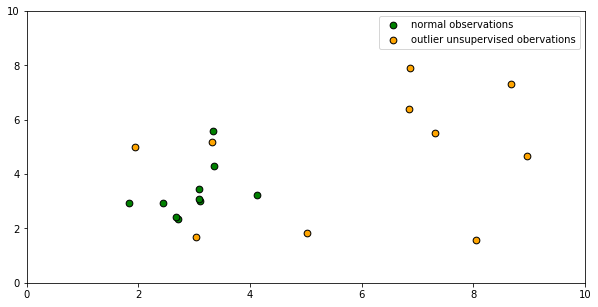

In [258]:
plt.subplots(1, figsize=(10, 5))
b1 = plt.scatter(testunsupnorm['x'], testunsupnorm['y'], c='green',
                 s=45, edgecolor='k')
b2 = plt.scatter(testunsupout['x'], testunsupout['y'], c='orange',
                 s=45, edgecolor='k')
plt.axis('tight')
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.legend([b1, b2],
           ["normal observations","outlier unsupervised obervations"],
           loc='best')
plt.xlabel('',fontsize = 18)
plt.ylabel('',fontsize = 18);

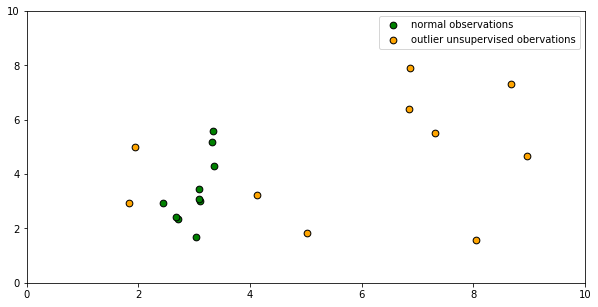

In [259]:
plt.subplots(1, figsize=(10, 5))
b1 = plt.scatter(testsupnorm['x'], testsupnorm['y'], c='green',
                 s=45, edgecolor='k')
b2 = plt.scatter(testsupout['x'], testsupout['y'], c='orange',
                 s=45, edgecolor='k')
plt.axis('tight')
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.legend([b1, b2],
           ["normal observations","outlier unsupervised obervations"],
           loc='best')
plt.xlabel('',fontsize = 18)
plt.ylabel('',fontsize = 18);